## Xử lý dữ liệu tập VN_housing_dataset (mới)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('VN_housing_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB


In [70]:
data.drop(columns='Unnamed: 0',inplace=True)
data.head(5)

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


In [71]:
data.shape

(82497, 12)

Kiểm tra dữ liệu trùng lặp

In [72]:
data[data.duplicated(keep=False)]


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
168,2020-08-04,"Đường Đông Thiên, Phường Vĩnh Hưng, Quận Hoàng...",Quận Hoàng Mai,Phường Vĩnh Hưng,"Nhà ngõ, hẻm",Đã có sổ,NaN,3 phòng,30 m²,NaN,NaN,70 triệu/m²
418,2020-08-04,"Đường Giải Phóng, Phường Giáp Bát, Quận Hoàng ...",Quận Hoàng Mai,Phường Giáp Bát,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"58,33 triệu/m²"
795,2020-08-04,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,45 m²,NaN,NaN,"88,89 triệu/m²"
866,2020-08-04,"Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...",Quận Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,60 m²,NaN,NaN,"76,67 triệu/m²"
946,2020-08-04,"Đường Nhân Hòa, Phường Nhân Chính, Quận Thanh ...",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,42 m²,NaN,NaN,"114,29 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
81446,2020-06-06,"Đường Giáp Bát, Phường Giáp Bát, Quận Hoàng Ma...",Quận Hoàng Mai,Phường Giáp Bát,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,48 m²,NaN,NaN,"72,92 triệu/m²"
81604,2020-06-06,"Đường Phạm Ngọc Thạch, Phường Kim Liên, Quận Đ...",Quận Đống Đa,Phường Kim Liên,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,40 m²,NaN,NaN,60 triệu/m²
81624,2020-06-06,"Đường Phạm Ngọc Thạch, Phường Kim Liên, Quận Đ...",Quận Đống Đa,Phường Kim Liên,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,40 m²,NaN,NaN,60 triệu/m²
81884,2020-06-06,"Đường Yên Lãng, Phường Thịnh Quang, Quận Đống...",Quận Đống Đa,Phường Thịnh Quang,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,32 m²,NaN,5 m,"98,44 triệu/m²"


In [73]:
data=data.drop_duplicates()
data = data.reset_index(drop=True)

In [74]:
data.shape

(81682, 12)

Kiểm tra dữ liệu bị thiếu

In [75]:
data.isnull().sum()

Ngày                   1
Địa chỉ               48
Quận                   2
Huyện                 48
Loại hình nhà ở       32
Giấy tờ pháp lý    28422
Số tầng            45463
Số phòng ngủ          39
Diện tích              2
Dài                61934
Rộng               46385
Giá/m2                13
dtype: int64

Xóa những dòng có nhiều hơn 50 phần trăm giá trị bị thiếu so với các cột

In [76]:
data.dropna(thresh=int(data.shape[1]/2), inplace=True)
data=data.reset_index(drop=True)
data.isnull().sum()

Ngày                   0
Địa chỉ               47
Quận                   1
Huyện                 47
Loại hình nhà ở       31
Giấy tờ pháp lý    28421
Số tầng            45462
Số phòng ngủ          38
Diện tích              1
Dài                61933
Rộng               46384
Giá/m2                12
dtype: int64

Với cột giá do dữ liệu bị thiếu không có căn cứ đề điền và số dòng ít so với tập nên xóa

In [77]:
for i in range(len(data)):
    if str(data.loc[i,'Giá/m2']) =='nan':
        data.drop(i,inplace=True)
data=data.reset_index(drop=True)
data['Giá/m2'].isnull().sum()

0

In [78]:
data[data['Quận'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
47971,2020-07-03,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²


In [79]:
#điền dữ liệu giả
data.loc[47971, 'Quận'] = 'Thanh Trì'
data.loc[47971, 'Huyện'] = 'Ngọc Hồi'

In [80]:
data[data['Huyện'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
174,2020-08-04,NaN,Quận Nam Từ Liêm,NaN,"Nhà ngõ, hẻm",NaN,NaN,1 phòng,30 m²,NaN,NaN,1 đ/m²
324,2020-08-04,"Đường An Dương Vương, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,77 m²,11 m,7 m,"97,4 triệu/m²"
741,2020-08-04,"Cầu Khê Tang, Quận Hà Đông, Hà Nội",Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,36 m²,NaN,NaN,"43,06 triệu/m²"
4521,2020-08-03,NaN,Huyện Hoài Đức,NaN,"Nhà ngõ, hẻm",NaN,NaN,1 phòng,30 m²,NaN,NaN,"16,67 triệu/m²"
5241,2020-08-02,NaN,Quận Long Biên,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,35 m²,NaN,NaN,2 đ/m²
5254,2020-08-02,NaN,Quận Long Biên,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,35 m²,NaN,NaN,"2,14 triệu/m²"
7110,2020-08-01,NaN,Huyện Thanh Trì,NaN,"Nhà ngõ, hẻm",NaN,NaN,1 phòng,50 m²,NaN,NaN,60 triệu/m²
8523,2020-07-31,NaN,Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²"
12512,2020-07-29,NaN,Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,2 phòng,40 m²,NaN,NaN,"27,5 triệu/m²"
14455,2020-07-28,NaN,Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,40 m²,NaN,NaN,25 triệu/m²


In [81]:
len(data[data['Huyện'].isnull()])

46

In [82]:
for i in range(len(data)):
    if str(data.loc[i,'Huyện'])=='nan':
        print(i)
        data.drop(i,inplace=True)
data=data.reset_index(drop=True)

174
324
741
4521
5241
5254
7110
8523
12512
14455
14955
21080
23024
27118
27185
29128
32682
35321
40323
40635
40919
43945
45800
46380
48878
51695
53910
54339
54567
58090
61186
61463
64688
68773
69795
71507
71982
73168
75049
75054
75896
77981
78559
79186
80096
80210


In [83]:
count={}
for i in range(len(data)):
    s=str(data.loc[i,'Địa chỉ'])
    len_value=str(len(s.split(',')))
    if len_value not in count:
        count[len_value]=1
    else:
        count[len_value]+=1
print(count)


{'4': 76009, '5': 4791, '1': 459, '6': 131, '7': 198, '3': 4, '8': 26, '9': 3, '2': 1, '12': 1}


cột địa chỉ có dữ liệu nhiễu khá nhiều nên xóa cột

In [84]:
data.drop(columns=['Địa chỉ','Ngày'],inplace=True)

In [85]:
data['Loại hình nhà ở'].unique()

array(['Nhà ngõ, hẻm', 'Nhà mặt phố, mặt tiền', 'Nhà biệt thự',
       'Nhà phố liền kề', nan], dtype=object)

In [86]:
data['Loại hình nhà ở'].fillna('Không rõ',inplace=True)

In [87]:
data['Giấy tờ pháp lý'].unique()

array(['Đã có sổ', nan, 'Đang chờ sổ', 'Giấy tờ khác'], dtype=object)

In [88]:
data['Giấy tờ pháp lý'].fillna('Không rõ',inplace=True)

In [89]:
data.isnull().sum()

Quận                   0
Huyện                  0
Loại hình nhà ở        0
Giấy tờ pháp lý        0
Số tầng            45414
Số phòng ngủ          38
Diện tích              0
Dài                61881
Rộng               46336
Giá/m2                 0
dtype: int64

In [90]:
data.shape

(81623, 10)

Chuẩn hóa tiền tệ sang đơn vị Triệu/m2

In [91]:
#Đếm đơn vị tiền tệ
tiente={}
for i in range(len(data)):
    
    x=str(data.loc[i,'Giá/m2'])
    if x !='nan':
        x,y = x.split(' ')
    else:
        y='nan'
    if y not in tiente:
        tiente[y]=1
    else:
        tiente[y]+=1
print(tiente)

{'triệu/m²': 80774, 'đ/m²': 731, 'tỷ/m²': 118}


In [92]:

for i in range(len(data)):
    x=str(data.loc[i,'Giá/m2'])
    a,b=x.split(' ')
    if '.' in a:
        a=a.replace('.','')
    if ',' in a:
        a=a.replace(',','.')
    try:
        a=float(a)
    except Exception as e:
        print(e)
        print(i)
        break
    if b == 'triệu/m²':
        data.loc[i,'Giá/m2']=round(a,3)
    elif b=='đ/m²':
        data.loc[i,'Giá/m2']=round((a/(10**6)),3)
    elif b=='tỷ/m²':
        data.loc[i,'Giá/m2']=round(a*(10**3),3)
data.head()

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,86.96
1,Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3 phòng,37 m²,NaN,NaN,116.22
2,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65.0
3,Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100.0
4,Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,NaN,4 phòng,36 m²,9 m,4 m,86.11


In [93]:
data = data.rename(columns={'Giá/m2': 'Triệu đồng/m2'})

In [94]:
data2=data.copy()

Chuẩn hóa số phòng ngủ, số tầng, dài, rộng, diện tích

In [95]:
data['Số tầng'].unique()

array(['4', nan, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

In [96]:
data.loc[data['Số tầng']=='Nhiều hơn 10','Số tầng']=11

In [97]:
data["Số phòng ngủ"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       nan], dtype=object)

In [98]:
data.loc[data["Số phòng ngủ"]=='nhiều hơn 10 phòng','Số phòng ngủ']='11'

In [99]:
for i in range(len(data)):
    x=str(data.loc[i,'Số phòng ngủ'])
    if x!='nan':
        x=x.split(' ')
        data.loc[i,'Số phòng ngủ']=int(x[0])
data["Số phòng ngủ"].unique()

array([5, 3, 4, 6, 11, 8, 2, 7, 9, 1, 10, nan], dtype=object)

In [100]:
for i in range(len(data)):
    x=str(data.loc[i,'Số tầng'])
    if x!='nan':
        
        data.loc[i,'Số tầng']=int(x)
data["Số tầng"].unique()

array([4, nan, 6, 5, 7, 2, 3, 8, 1, 9, 50, 38, 35, 10, 11, 45, 33, 42, 25,
       73, 12, 65, 55, 30, 14, 40, 52, 54, 32, 29], dtype=object)

In [101]:
for i in range(len(data)):
    x=str(data.loc[i,'Dài'])
    if x!='nan':
        x=x.split(' ')[0]
        data.loc[i,'Dài']=float(x)
data["Dài"].unique()

array([nan, 10.0, 12.75, 9.0, 12.1, 12.0, 13.0, 15.2, 18.0, 6.6, 11.0,
       22.0, 17.0, 8.5, 6.0, 8.0, 22.5, 6.5, 7.0, 9.5, 20.0, 9.2, 4.0,
       3.0, 50.0, 8.7, 8.75, 15.0, 8.04, 16.57, 9.72, 4.6, 11.7, 7.5,
       21.0, 22.6, 16.0, 5.0, 8.14, 14.0, 5.6, 12.25, 15.7, 16.55, 4.2,
       1430.0, 30.0, 48.0, 10.6, 8.96, 10.5, 8.3, 6.2, 19.0, 6.7, 10.2,
       5.5, 7.8, 10.4, 9.7, 11.25, 9.4, 2.7, 10.1, 12.5, 35.0, 9.8, 5.8,
       7.81, 8.2, 12.3, 7.4, 11.5, 4.5, 8.8, 3.8, 9.1, 9.3, 6.09, 25.0,
       14.8, 23.0, 105.0, 7.38, 13.1, 8.4, 7.7, 125.0, 3.1, 13.8, 6.8,
       11.1, 5.99, 2.0, 10.17, 38.0, 6.02, 24.0, 9.75, 7.2, 13.9, 9.6,
       11.2, 20.3, 85.0, 40.0, 10.84, 51.0, 11.74, 13.6, 5.2, 14.5, 32.0,
       19.3, 91.0, 1.0, 4.4, 10.3, 12.78, 23.3, 18.8, 12.8, 7.6, 75.0,
       13.4, 12.7, 65.0, 16.8, 11.6, 11000.0, 110.0, 1250.0, 18.2, 95.0,
       15.4, 18.5, 5.7, 106.0, 17.3, 9.26, 3.6, 17.5, 13.5, 3.7, 16.5,
       3.9, 7.3, 13.2, 13.7, 15.1, 14.2, 19000.0, 12.2, 144.0, 14.4,

In [102]:
for i in range(len(data)):
    x=str(data.loc[i,'Rộng'])
    if x!='nan':
        x=x.split(' ')[0]
        data.loc[i,'Rộng']=float(x)
data["Rộng"].unique()

array([nan, 4.0, 3.8, 4.5, 6.8, 6.5, 3.5, 5.0, 3.9, 4.2, 5.3, 7.0, 8.0,
       3.1, 3.0, 4.3, 9.0, 3.4, 3.2, 3.6, 3.25, 53.0, 6.0, 7.55, 3.7, 4.8,
       4.1, 4.55, 3.3, 3.73, 5.6, 38.0, 33.0, 32.0, 13.0, 45.0, 42.0, 7.3,
       6.3, 3.78, 3.65, 5.5, 4.6, 3.75, 12.0, 3500.0, 3.46, 2.9, 35.0,
       6.2, 4.16, 3.06, 5.7, 3.55, 6.1, 5.4, 6.6, 4.4, 37.0, 5.1, 41.0,
       7.4, 348.0, 2.0, 4.29, 5.94, 30.0, 4.12, 10.0, 85.0, 7.2, 5.2, 5.9,
       3.57, 5.8, 3.95, 7.6, 3.53, 15.0, 5.58, 18.0, 2.8, 6.05, 6.7, 4.9,
       34.0, 36.0, 500.0, 3600.0, 25.0, 2.7, 8.85, 13.5, 52.0, 7.8, 39.0,
       430.0, 9.5, 4.33, 1.0, 3.85, 2.5, 4.52, 3.44, 4.98, 31.0, 4.75,
       20.0, 48.0, 43.0, 7.5, 4.21, 8.1, 3.31, 8.5, 4.7, 12.5, 95.0, 3.87,
       16.0, 4.65, 9.3, 44.0, 3.05, 40.0, 8.2, 56.0, 8.3, 3100.0, 2.1,
       400.0, 10.4, 11.5, 2.2, 4.54, 14.0, 5.35, 350.0, 8.35, 2.6, 3.86,
       3.79, 76.0, 47.0, 5.85, 3.26, 7.1, 4.15, 3.56, 3400.0, 55.0, 68.0,
       5.16, 3.15, 11.0, 3.14, 6.9, 65.0, 3.68, 

In [103]:
data['Diện tích'].unique()[:50]

array(['46 m²', '37 m²', '40 m²', '51 m²', '36 m²', '52 m²', '32 m²',
       '75 m²', '41 m²', '35 m²', '30 m²', '50 m²', '52.8 m²', '165 m²',
       '70 m²', '34 m²', '65 m²', '45 m²', '79 m²', '90 m²', '73 m²',
       '18 m²', '42 m²', '43 m²', '25 m²', '38 m²', '49 m²', '33 m²',
       '120 m²', '200 m²', '47 m²', '55 m²', '77 m²', '27 m²', '60 m²',
       '81 m²', '20 m²', '54 m²', '28 m²', '113 m²', '76 m²', '62 m²',
       '11 m²', '44 m²', '21 m²', '58 m²', '196 m²', '48 m²', '24 m²',
       '56 m²'], dtype=object)

In [104]:
for i in range(len(data)):
    x=str(data.loc[i,'Diện tích']).split(' ')
    data.loc[i,'Diện tích']=float(x[0])
data['Diện tích'].unique()[:50]

array([46.0, 37.0, 40.0, 51.0, 36.0, 52.0, 32.0, 75.0, 41.0, 35.0, 30.0,
       50.0, 52.8, 165.0, 70.0, 34.0, 65.0, 45.0, 79.0, 90.0, 73.0, 18.0,
       42.0, 43.0, 25.0, 38.0, 49.0, 33.0, 120.0, 200.0, 47.0, 55.0, 77.0,
       27.0, 60.0, 81.0, 20.0, 54.0, 28.0, 113.0, 76.0, 62.0, 11.0, 44.0,
       21.0, 58.0, 196.0, 48.0, 24.0, 56.0], dtype=object)

Xử lý nhiễu và chuẩn hóa tiền

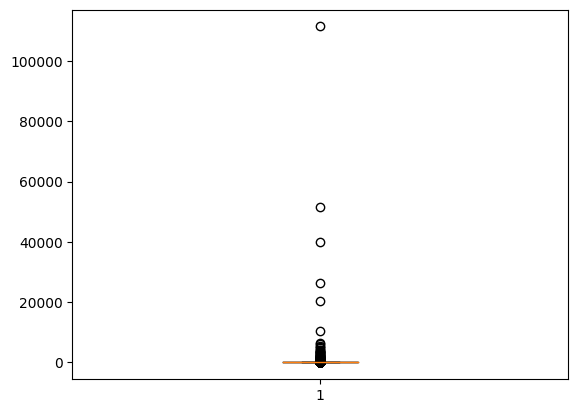

In [105]:
plt.boxplot(data["Diện tích"])
plt.show()

Dùng phân vị để xem độ phân tán và bất thường của diện tích

In [106]:
x=data[data['Diện tích'] <= data['Diện tích'].quantile(0.0005)]
print(len(x))
x.head(10)

45


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng/m2
525,Quận Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,3.0,NaN,NaN,810.0
2919,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,NaN,5,3.99,NaN,NaN,1316.667
3573,Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,3.0,9.0,4.0,1200.0
4468,Quận Hai Bà Trưng,Phường Trương Định,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3,1.0,NaN,NaN,2200.0
4521,Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,2,1.0,1.0,1.0,2280.0
4776,Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,NaN,4,3.0,9.0,4.0,1166.667
9414,Quận Long Biên,Phường Long Biên,"Nhà ngõ, hẻm",Đã có sổ,NaN,4,2.0,12.0,4.0,2650.0
10879,Quận Nam Từ Liêm,Phường Phú Đô,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,3,3.0,10.0,3.5,850.0
13025,Quận Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà ngõ, hẻm",Không rõ,NaN,4,4.0,NaN,NaN,812.5
16451,Quận Nam Từ Liêm,Phường Cầu Diễn,"Nhà ngõ, hẻm",Không rõ,NaN,4,4.0,NaN,NaN,912.5


In [107]:
x=data[data['Diện tích'] >= data['Diện tích'].quantile(0.9998)]
print(len(x))
x.head(10)

17


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng/m2
1567,Quận Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,NaN,5,3659.0,NaN,NaN,0.998
1576,Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,NaN,4,6459.0,NaN,NaN,0.41
1651,Quận Hoàng Mai,Phường Đại Kim,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,20430.0,NaN,NaN,0.07
5102,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,NaN,5,4141.0,NaN,NaN,0.918
15091,Quận Hà Đông,Phường Phú La,"Nhà ngõ, hẻm",Đã có sổ,2,3,26400.0,8800.0,3000.0,0.062
17340,Quận Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,4,3,111411.0,NaN,NaN,0.0
24707,Quận Hai Bà Trưng,Phường Thanh Lương,Nhà phố liền kề,Đã có sổ,5,3,40000.0,87.0,46.0,0.158
36975,Quận Hà Đông,Phường Nguyễn Trãi,"Nhà ngõ, hẻm",Đã có sổ,NaN,4,4848.0,8.0,6.0,0.578
38433,Huyện Ba Vì,Xã Vân Hòa,"Nhà mặt phố, mặt tiền",Không rõ,NaN,2,3600.0,NaN,NaN,1.39
53110,Huyện Thanh Trì,Xã Tân Triều,Nhà phố liền kề,Đã có sổ,3,5,5625.0,1225.0,450.0,0.747


Ta có thể thấy số diện tích và giá ở trên không hợp lý và đây là những dữ liệu gây nhiễu

In [108]:
print('Shape trước: ',data.shape)
min_=data['Diện tích'].quantile(0.0005)
max_=data['Diện tích'].quantile(0.9998)

data=data[data['Diện tích'] >= min_]
data=data[data['Diện tích'] <= max_]
print('Shape sau:', data.shape)

Shape trước:  (81623, 10)
Shape sau: (81580, 10)


In [109]:
data=data.reset_index(drop=True)# reset lại index trong data

Chuyển Triệu đồng/m2 thành Triệu đồng

In [110]:
data['Triệu đồng/m2']=data['Triệu đồng/m2']*data['Diện tích']
data=data.rename(columns={'Triệu đồng/m2':'Triệu đồng'})
data.head(5)

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
0,Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,NaN,NaN,4000.16
1,Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3,37.0,NaN,NaN,4300.14
2,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,10.0,4.0,2600.0
3,Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6,51.0,12.75,4.0,5100.0
4,Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,NaN,4,36.0,9.0,4.0,3099.96


In [111]:
x=data[data['Dài']>=data['Dài'].quantile(0.988)]
print(x.shape)
x

(255, 10)


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
544,Quận Ba Đình,Phường Vĩnh Phúc,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4,45.0,1430.0,3500.0,7799.85
2554,Quận Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,2,37.0,105.0,3600.0,4249.82
2750,Quận Long Biên,Phường Ngọc Lâm,"Nhà ngõ, hẻm",Đã có sổ,NaN,4,65.0,125.0,52.0,7900.1
4256,Quận Hà Đông,Phường Kiến Hưng,"Nhà ngõ, hẻm",Không rõ,NaN,4,35.0,85.0,5.0,2100.0
4424,Huyện Đông Anh,Xã Võng La,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,50.0,125.0,4.0,1850.0
...,...,...,...,...,...,...,...,...,...,...
79473,Quận Đống Đa,Phường Hàng Bột,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,35.0,10000.0,3500.0,5199.95
79497,Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,33.0,85.0,4.0,3350.16
79750,Quận Thanh Xuân,Phường Hạ Đình,"Nhà ngõ, hẻm",Giấy tờ khác,NaN,2,51.0,12900.0,3500.0,1298.97
79836,Quận Long Biên,Phường Long Biên,"Nhà mặt phố, mặt tiền",Đã có sổ,5,2,40.0,938.0,419.0,4050.0


In [112]:
x=data[data['Dài']<=data['Dài'].quantile(0.0005)]
print(x.shape)
x

(18, 10)


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
11247,Quận Cầu Giấy,Phường Dịch Vọng Hậu,"Nhà ngõ, hẻm",Đã có sổ,5,5,66.0,1.0,5.0,11400.18
24595,Quận Đống Đa,Phường Ô Chợ Dừa,"Nhà mặt phố, mặt tiền",Đã có sổ,4,4,40.0,1.0,1.0,3500.0
25967,Quận Đống Đa,Phường Văn Miếu,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4,30.0,1.0,1.0,2649.9
32167,Huyện Sóc Sơn,Xã Phú Cường,Nhà phố liền kề,Không rõ,NaN,2,46.0,1.0,4.0,1150.0
38897,Huyện Hoài Đức,Xã Vân Canh,"Nhà ngõ, hẻm",Đang chờ sổ,NaN,4,120.0,1.0,6.0,1749.6
43273,Quận Đống Đa,Phường Láng Hạ,"Nhà ngõ, hẻm",Đã có sổ,4,3,40.0,1.0,1.0,5500.0
47968,Huyện Đan Phượng,Thị trấn Phùng,Nhà biệt thự,Đã có sổ,NaN,6,250.0,1.0,1.0,6800.0
48599,Huyện Hoài Đức,Thị trấn Trạm Trôi,Nhà biệt thự,Đã có sổ,5,8,300.0,1.0,1.0,9000.0
48665,Quận Hà Đông,Phường Phú Lương,"Nhà ngõ, hẻm",Đã có sổ,2,2,50.0,1.0,1.0,1800.0
50648,Quận Hoàng Mai,Phường Yên Sở,"Nhà ngõ, hẻm",Đã có sổ,4,2,38.0,1.0,3.0,3899.94


In [113]:
data=data[(data['Dài']<data['Dài'].quantile(0.988))&(data['Dài']>data['Dài'].quantile(0.0005))]
data=data.reset_index(drop=True)

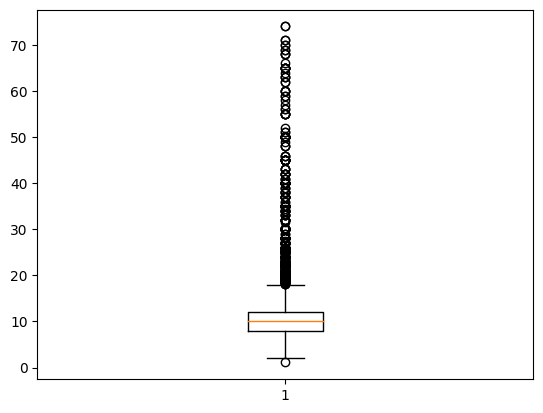

In [114]:
plt.boxplot(data["Dài"])
plt.show()

In [115]:
data3=data.copy()

In [116]:
x=data[data['Rộng']>=data['Rộng'].quantile(0.988)]
print(x.shape)
x

(235, 10)


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
34,Quận Thanh Xuân,Phường Nhân Chính,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,5,49.0,20.0,53.0,3949.89
105,Huyện Hoài Đức,Xã Vân Canh,"Nhà ngõ, hẻm",Không rõ,NaN,2,42.0,10.0,42.0,2100.0
131,Quận Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,5,6,67.0,15.0,45.0,7499.98
291,Quận Đống Đa,Phường Ngã Tư Sở,"Nhà mặt phố, mặt tiền",Đã có sổ,6,4,30.0,12.0,41.0,5900.1
322,Quận Long Biên,Phường Thượng Thanh,"Nhà ngõ, hẻm",Đã có sổ,4,5,39.0,11.0,348.0,2850.12
...,...,...,...,...,...,...,...,...,...,...
18977,Quận Long Biên,Phường Đức Giang,"Nhà mặt phố, mặt tiền",Đã có sổ,3,3,112.0,25.0,4500.0,15120.0
19020,Quận Nam Từ Liêm,Phường Phương Canh,Nhà phố liền kề,Đã có sổ,5,5,41.0,12.0,379.0,3699.84
19049,Huyện Ba Vì,Xã Phú Sơn,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,2,882.0,21.0,42.0,24.696
19114,Quận Hoàng Mai,Phường Lĩnh Nam,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,31.0,8.0,370.0,2449.93


In [117]:
x=data[data['Rộng']<=data['Rộng'].quantile(0.0005)]
print(x.shape)
x

(52, 10)


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
636,Quận Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà mặt phố, mặt tiền",Không rõ,NaN,3,30.0,2.0,1.0,4850.1
1141,Quận Hai Bà Trưng,Phường Trương Định,"Nhà ngõ, hẻm",Đã có sổ,5,4,30.0,2.0,2.0,3099.9
3498,Quận Hoàn Kiếm,Phường Hàng Bồ,"Nhà ngõ, hẻm",Không rõ,NaN,3,12.0,5.0,2.0,1299.96
3603,Quận Hoàng Mai,Phường Thịnh Liệt,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,30.0,3.0,2.0,2499.9
5421,Quận Đống Đa,Phường Trung Liệt,"Nhà mặt phố, mặt tiền",Giấy tờ khác,NaN,2,10.0,5.0,2.0,750.0
5479,Quận Hà Đông,Phường Văn Quán,"Nhà ngõ, hẻm",Đã có sổ,NaN,3,33.0,8.0,1.0,2300.1
5563,Quận Hai Bà Trưng,Phường Phạm Đình Hổ,"Nhà mặt phố, mặt tiền",Đã có sổ,4,4,32.0,2.0,1.0,4300.16
6224,Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,5,4,28.0,10.0,2.0,3650.08
6482,Quận Hai Bà Trưng,Phường Thanh Nhàn,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,2,22.0,11.0,2.0,1499.96
6673,Quận Đống Đa,Phường Văn Chương,"Nhà ngõ, hẻm",Đã có sổ,5,5,27.0,21.0,1.0,2700.0


In [118]:
data=data[(data['Rộng']<data['Rộng'].quantile(0.988))&(data['Rộng']>data['Rộng'].quantile(0.0005))]
data=data.reset_index(drop=True)

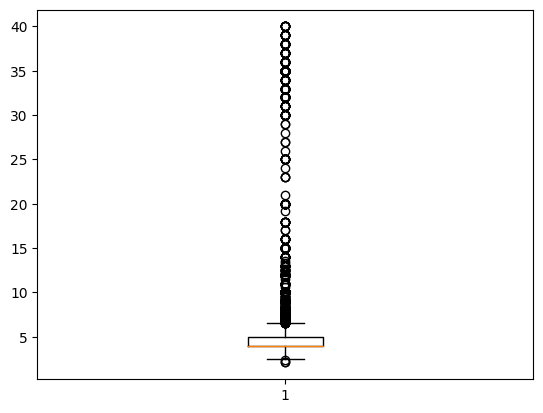

In [119]:
plt.boxplot(data["Rộng"])
plt.show()

Kiểm tra số tầng và số phòng ngủ

In [120]:
data['Số tầng'].unique()

array([4, nan, 5, 3, 6, 1, 2, 7, 9, 8, 50, 10, 11, 33, 45, 73, 35, 12, 55,
       52, 54], dtype=object)

In [121]:

x=data[data['Số tầng']>=data['Số tầng'].quantile(0.999)]
print(x.shape)
x

(12, 10)


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
496,Quận Long Biên,Phường Thạch Bàn,"Nhà ngõ, hẻm",Đã có sổ,50,3,30.0,8.0,4.0,2250.0
2778,Quận Cầu Giấy,Phường Trung Hoà,"Nhà ngõ, hẻm",Đã có sổ,33,2,21.0,7.0,3.3,2199.96
2969,Huyện Đan Phượng,Thị trấn Phùng,Nhà biệt thự,Giấy tờ khác,45,6,200.0,25.0,8.0,5000.0
3208,Quận Long Biên,Phường Phúc Lợi,"Nhà ngõ, hẻm",Đã có sổ,45,3,30.0,6.77,4.45,1850.1
4369,Quận Long Biên,Phường Phúc Lợi,"Nhà ngõ, hẻm",Đã có sổ,45,3,30.0,6.0,5.0,1890.0
8137,Quận Tây Hồ,Phường Thụy Khuê,Nhà biệt thự,Đã có sổ,73,6,73.0,14.0,5.0,5940.01
8755,Quận Long Biên,Phường Cự Khối,"Nhà ngõ, hẻm",Đã có sổ,35,3,63.0,18.0,34.0,4249.98
9048,Quận Đống Đa,Phường Ô Chợ Dừa,Nhà phố liền kề,Đã có sổ,12,5,59.0,11.0,5.0,8500.13
10112,Quận Thanh Xuân,Phường Khương Trung,"Nhà mặt phố, mặt tiền",Đã có sổ,55,6,45.0,12.0,4.0,4850.1
12915,Quận Hoàn Kiếm,Phường Phúc Tân,"Nhà mặt phố, mặt tiền",Đã có sổ,52,6,150.0,15.0,10.0,16999.5


Ta thấy đây là những mẫu dữ liệu vô lý do số tầng đã vượt quá 10 tầng, và số phòng ngủ lại không tương xứng => nghi ngờ về mặt nhà ở

In [122]:
data=data[data['Số tầng']<data['Số tầng'].quantile(0.999)]
data=data.reset_index(drop=True)

In [123]:

x=data[data['Số phòng ngủ']>=data['Số phòng ngủ'].quantile(0.999)]
print(x.shape)
x

(156, 10)


,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
8,Quận Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,11,70.0,17.0,4.0,8000.3
46,Quận Nam Từ Liêm,Phường Mễ Trì,"Nhà ngõ, hẻm",Đã có sổ,6,11,56.0,9.0,6.0,7300.16
203,Quận Hoàng Mai,Phường Giáp Bát,"Nhà mặt phố, mặt tiền",Đã có sổ,9,11,100.0,10.0,10.0,12000.0
304,Quận Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà mặt phố, mặt tiền",Đã có sổ,6,11,65.0,11.0,7.0,6999.85
418,Quận Hà Đông,Phường Văn Quán,Nhà biệt thự,Đã có sổ,7,11,460.0,23.0,20.0,71999.2
...,...,...,...,...,...,...,...,...,...,...
11020,Quận Hà Đông,Phường Yên Nghĩa,"Nhà mặt phố, mặt tiền",Đã có sổ,7,11,90.0,12.0,7.0,7900.2
11033,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,5,11,55.0,11.0,5.0,7400.25
11134,Quận Bắc Từ Liêm,Phường Xuân Tảo,"Nhà mặt phố, mặt tiền",Đã có sổ,7,11,100.0,20.0,5.0,29000.0
11153,Quận Đống Đa,Phường Láng Thượng,Nhà phố liền kề,Đã có sổ,7,11,65.0,16.0,4.0,165000.03


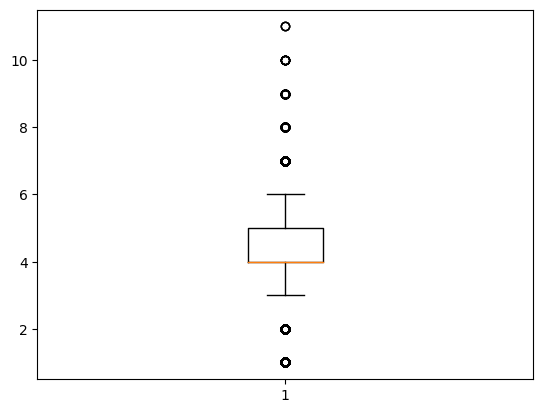

In [124]:
plt.boxplot(data["Số tầng"])
plt.show()

In [125]:
data5=data.copy()

Điền khuyết bằng trung bình

In [126]:
data['Số tầng'].fillna(int(data['Số tầng'].mean()), inplace=True)
data['Số phòng ngủ'].fillna(int(data['Số phòng ngủ'].mean()), inplace=True)
data['Dài'].fillna(int(data['Dài'].mean()), inplace=True)
data['Rộng'].fillna(int(data['Rộng'].mean()), inplace=True)

In [127]:
data.isnull().sum()

Quận               0
Huyện              0
Loại hình nhà ở    0
Giấy tờ pháp lý    0
Số tầng            0
Số phòng ngủ       0
Diện tích          0
Dài                0
Rộng               0
Triệu đồng         0
dtype: int64

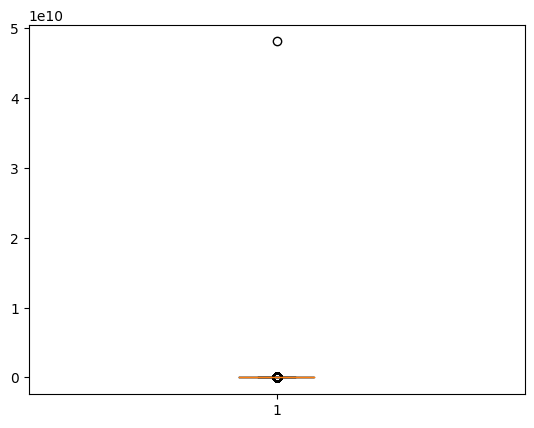

In [128]:
plt.boxplot(data["Triệu đồng"])
plt.show()

In [129]:
quan=data.groupby(['Quận'])
data['Lower Bound'] = quan['Triệu đồng'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
data['Upper Bound'] = quan['Triệu đồng'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))


In [130]:
data.head(3)

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng,Lower Bound,Upper Bound
0,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,10.0,4.0,2600.0,-912.6525,8707.5675
1,Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4,52.0,12.0,4.2,4850.04,-1125.0000,8675.0000
2,Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5,90.0,18.0,5.0,9800.1,-1500.0750,7300.1250


In [131]:
data = data[(data['Triệu đồng'] >= data['Lower Bound']) & (data['Triệu đồng'] <= data['Upper Bound'])]
data = data.drop(['Lower Bound', 'Upper Bound'], axis=1)

In [132]:
sum(data.duplicated())

189

In [133]:
data.shape

(10212, 10)

In [134]:
data6=data.copy()
x=data.shape[0]
print(data.shape)
data=data.drop_duplicates()
data=data.reset_index(drop=True)
print(data.shape)
print('Sub: ',x-data.shape[0])

(10212, 10)
(10023, 10)
Sub:  189


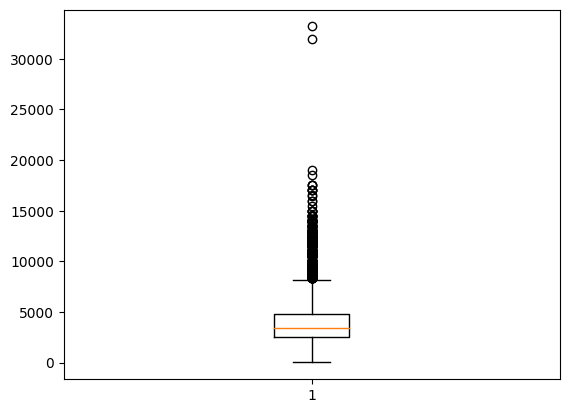

In [135]:
plt.boxplot(data["Triệu đồng"])
plt.show()

In [136]:
data.head(10)

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
0,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,10.0,4.0,2600.0
1,Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4,52.0,12.0,4.2,4850.04
2,Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3,32.0,6.6,4.5,1950.08
3,Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2,42.0,11.0,4.0,1249.92
4,Huyện Thanh Trì,Xã Tam Hiệp,"Nhà ngõ, hẻm",Đã có sổ,4,4,43.0,11.0,4.0,2150.0
5,Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,4,4,38.0,10.0,3.0,2599.96
6,Quận Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,11,70.0,17.0,4.0,8000.3
7,Quận Hà Đông,Phường Vạn Phúc,"Nhà ngõ, hẻm",Đã có sổ,5,4,30.0,9.0,3.4,2480.1
8,Quận Hai Bà Trưng,Phường Thanh Lương,"Nhà ngõ, hẻm",Đã có sổ,4,2,18.0,6.0,3.2,1900.08
9,Quận Ba Đình,Phường Ngọc Hà,"Nhà ngõ, hẻm",Đã có sổ,5,5,33.0,11.0,3.0,4499.88


Dữ liệu sạch tiến hành lưu lại

In [137]:
data.to_csv('Nha_ver2.csv')